## Network inference from glycoproteomics data reveals new reactions in the IgG glycosylation pathway.
## https://www.ncbi.nlm.nih.gov/pubmed/29133956

In [1]:
import pandas as pd
import glycompare
import glypy


Thanks for using the GlyCompare v1.0, 
Please check our github for the latest update.


Bokan & Ben,
08/1/2019




In [2]:
k_2013 = pd.read_csv('/Users/apple/Desktop/NathanLab/glycan_data/Korčula2013.txt', header=0, sep='\t', index_col=0)
k_2010 = pd.read_csv('/Users/apple/Desktop/NathanLab/glycan_data/Korčula2010.txt', header=0, sep='\t', index_col=0)
split = pd.read_csv('/Users/apple/Desktop/NathanLab/glycan_data/Split.txt', header=0, sep='\t', index_col=0)
vis = pd.read_csv('/Users/apple/Desktop/NathanLab/glycan_data/Vis.txt', header=0, sep='\t', index_col=0)

In [3]:
a = set([i.split('_')[1] for i in set(list(k_2013.columns)+list(k_2010.columns)+list(split)+list(vis))])
a

{'G0',
 'G0F',
 'G0FN',
 'G0N',
 'G1',
 'G1F',
 'G1FN',
 'G1FNS',
 'G1FS',
 'G1N',
 'G1NS',
 'G1S',
 'G2',
 'G2F',
 'G2FN',
 'G2FNS',
 'G2FS',
 'G2N',
 'G2NS',
 'G2S'}

In [4]:
from glycompare import glycan_io
glytoucan_db = glycan_io.load_glytoucan_database('/Users/apple/PycharmProjects/GlyCompare/glycompare/database/glytoucan_database.json')

loading glytoucan_database from  /Users/apple/PycharmProjects/GlyCompare/glycompare/database/glytoucan_database.json


In [9]:
# #     glyp.plot_glycan()
# glycan_match = {'G0':'G88876JQ',
# 'G0F':'G65984FE',
# 'G0FN':1,
# 'G0N':1,
# 'G1':'G44754DF',
# 'G1F':'G29024OJ',
# 'G1FN':1,
# 'G1FNS':1,
# 'G1FS':1,
# 'G1N':1,
# 'G1NS':1,
# 'G1S':1,
# 'G2':'G66741YQ',
# 'G2F':'G00998NI',
# 'G2FN':1,
# 'G2FNS':1,
# 'G2FS':1,
# 'G2N':1,
# 'G2NS':1,
# 'G2S':1}
# a_glycan = glycan_io.load_glycan_obj_from_glycoct_file('/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017')
# for i in glycan_match:
#     if glycan_match[i]!=1:
#         a_glycan[i] = glycan_io.load_glycan_obj_from_glytoucan(glycan_match[i], glytoucan_db)
# glycompare.glycan_io.output_glycan_dict_to_glycoct_dict(a_glycan,'/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/glycan_glycoct_dict.json', )
# for i in a_glycan:
#     glycompare.plot_glycan_utilities.plot_glycan(a_glycan[i], title=i, label=True, addr='/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/'+i+'.eps')

In [5]:
glycan_dict = glycan_io.load_glycan_dict_from_json('/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/glycan_glycoct_dict.json')

In [11]:
group_1 = []
group_2 = []
group_4 = []
group_id_1 = []
group_id_2 = []
group_id_4 = []

for i in k_2013.columns:
    x,y = i.split('_')
    if i.find('IgG1') != -1:
        group_id_1.append(i)
        group_1.append(y)
    elif i.find('IgG2') != -1:
        group_id_2.append(i)
        group_2.append(y)
    elif i.find('IgG4') != -1:
        group_id_4.append(i)
        group_4.append(y)
    else:
        print(i)


In [19]:
table_list=[]
output_name_ = []
data_name_list = ['k_2010', 'k_2013', 'split', 'vis']
ig_name_list = ['group_1', 'group_2', 'group_4']
ig_table_list = [group_1, group_2, group_4]

for idex, i in enumerate([k_2010, k_2013, split, vis]):
    for jdex, j in enumerate([group_id_1, group_id_2, group_id_4]):
        _table = i[j]
        
        _table.columns = [k.split('_')[1] for k in _table[j].columns]
        table_list.append(_table)

        output_name_.append(data_name_list[idex]+'_'+ig_name_list[jdex])


In [20]:

for idex, i in enumerate(table_list):
    i.to_csv('/Users/apple/Desktop/NathanLab/glycan_data/'+output_name_[idex]+'.csv')

In [1]:
import os
from importlib import reload

import pandas as pd
import seaborn as sns
from scipy.stats import zscore

from glycompare import *
import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline


Thanks for using the GlyCompare v1.0, 
Please check our github for the latest update.


Bokan & Ben,
08/1/2019




In [2]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
# glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = True
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/'
project_name = "be2017"
costumized_glycan_identifier = False
external_profile_naming= False
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, )
keywords_dict

{'project_name': 'be2017',
 'working_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/glycoct/',
 'source_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/source_data/',
 'output_data_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/',
 'plot_output_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_plot/',
 'glycan_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/be2017_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/be2017_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/be2017_substructure_glycoct_dict.json',
 'substructure_glycoct_vec_addr': '/Users/apple/PycharmProjects/GlyCompare/

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
end loading glycoct from  /Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/glycoct/
Saved /Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/be2017_glycan_glycoct_dict.json for future use. You can use "used" in the datatype next time


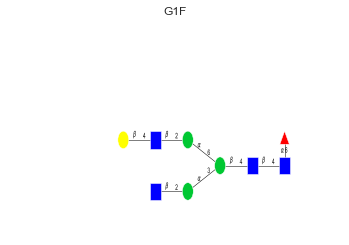

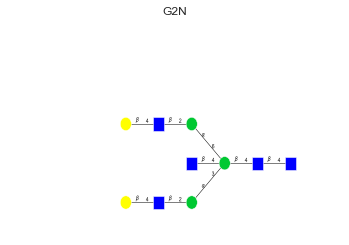

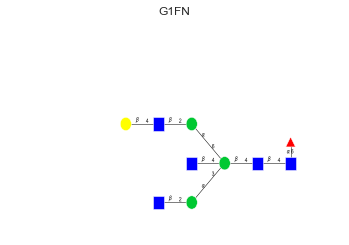

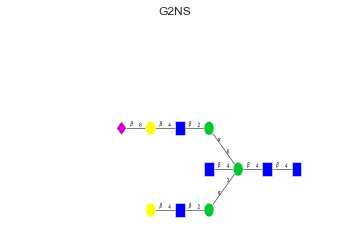

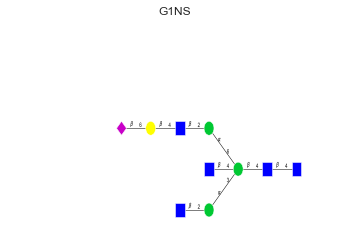

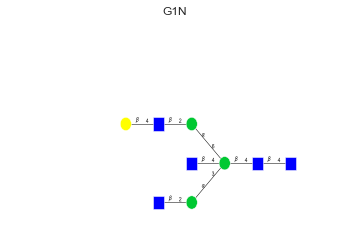

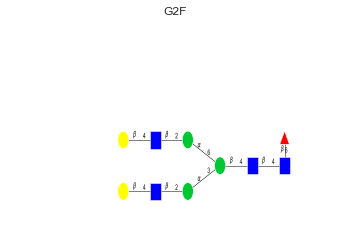

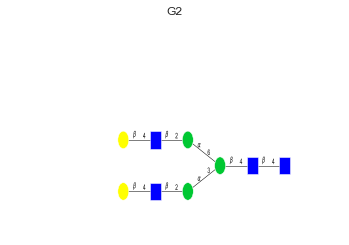

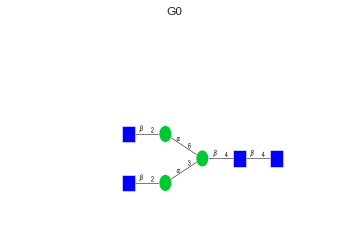

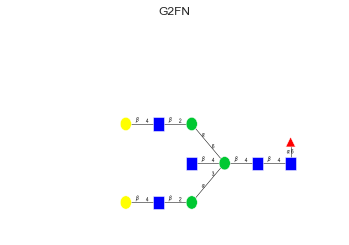

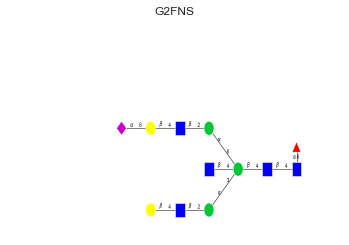

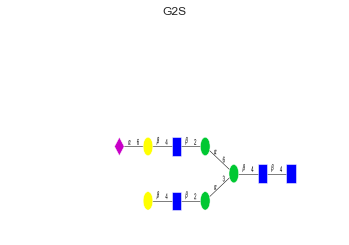

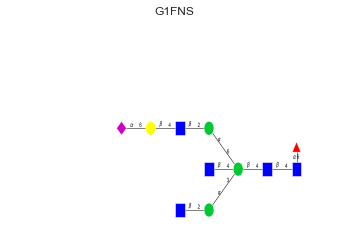

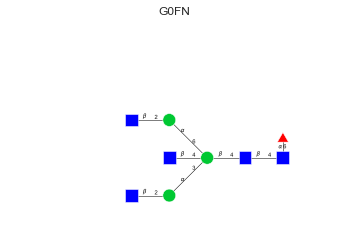

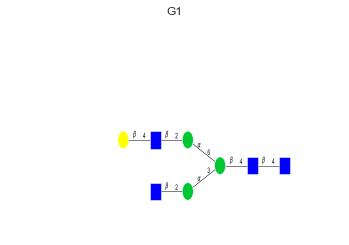

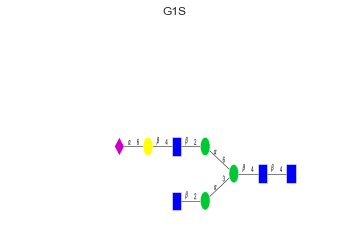

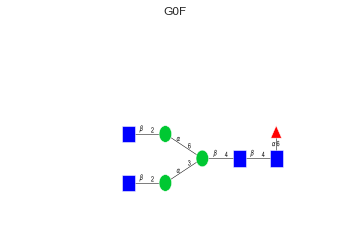

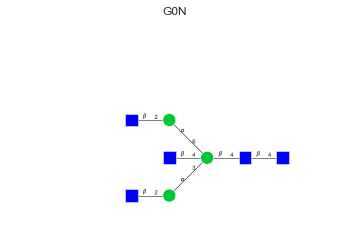

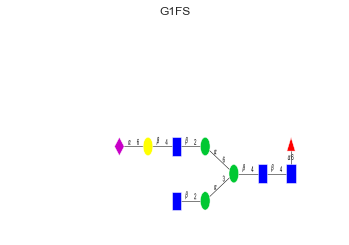

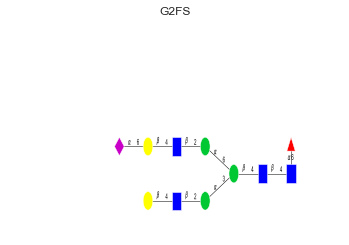

In [77]:
# pipeline_functions.check_init_dir(keywords_dict)
reload(pipeline_functions)
data_name_ = ['k_2010_group_1.csv','k_2010_group_2.csv','k_2010_group_4.csv']
meta_name = []
for i in data_name_:
    _ = pd.read_csv(os.path.join(working_addr,'source_data',i), sep=',', index_col=0)
    meta_name.extend(list(_.columns))
meta_name = set(meta_name)
structure_loader = list(meta_name)

data_type = 'local_glycoct'
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type, 
                                           structure_loader=structure_loader)

for i in glycan_dict:
    plot_glycan_utilities.plot_glycan(glycan_dict[i], label=True, title=i)

In [22]:
reload(pipeline_functions)
reload(merge_substructure_vec)
glycan_substructure_occurance_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, 
                                                                     num_processors=num_processors,
                                                                     linkage_specific=linkage_specific, 
                                                                     forced=True)

start glycan_dict
start parallel parsing 20 glycans
start G1F
start G2NS
start G1N
start G1NS
start G2
start G2N
start G2F
start G1FN
G2 9 2.0963802337646484
start G0
G1F 9 2.138258934020996
start G2FN
G1N 9 2.328310012817383
start G2FNS
G0 7 0.3218569755554199
start G2S
G2F 10 3.3190550804138184
start G1FNS
G1FN 10 3.3611950874328613
G2N 10 3.471043109893799
G1NS 10 3.467686891555786
start G0FN
start G1
start G1S
G1 8 0.47510695457458496
start G0F
G2S 10 1.8887486457824707
start G0N
G1S 9 1.0341169834136963
G0F 8 0.7023999691009521
start G1FS
start G2FS
G0FN 9 1.2565200328826904
G2NS 11 4.948301076889038
G0N 8 0.6646020412445068
G2FN 11 3.415369987487793
G1FS 10 1.470541000366211
G1FNS 11 3.195261001586914
G2FS 11 2.567434072494507
G2FNS 12 4.975265741348267
finished pool
glycan_dict 20
finished merging all substructures into substructure_dic
start merge substructure_dict
Start merge_glycan_substructure_to_substructure_dict
combine original
substructure_dict is merged with len  1856
f

the glycan core is
start substructure_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
Finish the n-glycan match  63  substructures are matched to the n-glycan core
start building dependence_tree
5
6
7
8
9
10
11
12


({57: [84, 85, 94, 104, 110],
  84: [112, 117, 127, 136, 145],
  85: [117, 118, 128, 137, 146],
  94: [127, 128, 142],
  104: [136, 137, 142],
  110: [145, 146],
  112: [148, 154, 166, 176],
  117: [148, 152, 161, 167, 178],
  118: [149, 152, 160, 162, 168, 177],
  127: [154, 161, 174],
  128: [161, 162, 175],
  136: [166, 167, 174],
  137: [167, 168, 175],
  142: [174, 175],
  145: [176, 178],
  146: [177, 178],
  148: [180, 183, 190, 200],
  149: [181, 191, 197],
  152: [180, 181, 188, 189, 192, 201],
  154: [183, 195],
  160: [184, 188],
  161: [183, 189, 198],
  162: [184, 189, 197, 199],
  166: [190, 195],
  167: [190, 192, 198],
  168: [191, 192, 199],
  174: [195, 198],
  175: [198, 199],
  176: [200],
  177: [201],
  178: [200, 201],
  180: [202, 204, 205, 207, 214],
  181: [202, 208, 212],
  183: [205, 210],
  184: [206],
  188: [204, 206],
  189: [205, 206, 212, 213],
  190: [207, 210],
  191: [208, 211],
  192: [207, 208, 213],
  195: [210],
  197: [211, 212],
  198: [210, 2

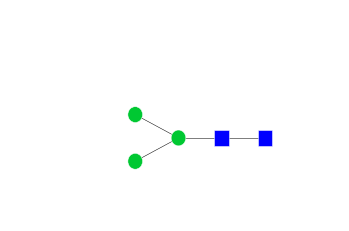

In [23]:
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']

substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)
core = select_motifs.nglycan_core
_substructure_lab = select_motifs.substructureLabwithCore(substructure_=substructure_dict,
                                                    glycan_core=core,
                                                    linkage_specific=linkage_specific)  # unicarbkb_substructures_12259.json

_substructure_lab.get_dependence_tree_core()

In [28]:
abd_table = glycan_io.load_table(os.path.join(keywords_dict['source_dir'], 'k_2010_group_1.csv'))
abd_table = abd_table.transpose()
_, glycoprofile_list = pipeline_functions.glycoprofile_pip(keywords_dict, 
                                                           abd_table, 
                                                           unique_glycan_identifier_to_structure_id=True, 
                                                           already_glytoucan_id=True,
                                                           external_profile_naming=False, 
                                                           forced=True)

abd_list 20 profile_list 504
20 504
no external profile naming found





































































































































































































































































































































































































































































































































































































































































































































































































































































































































































In [67]:
keywords_dict['plot_output_dir']

'/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_plot/'

the glycan core is
start substructure_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
Finish the n-glycan match  63  substructures are matched to the n-glycan core
start building dependence_tree
5
6
7
8
9
10
11
12
Start dropping nodes with weight zero, nodes count: 63
Nodes left []
63 150
_a.nodes 63
_a.nodes 63
merged_weights_dict 63
After first drop 42 + 21 =  63 63.0
mod_nodes 21
mod_edges 37
_substructure_lab.core_index 57


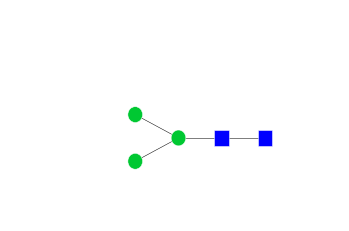

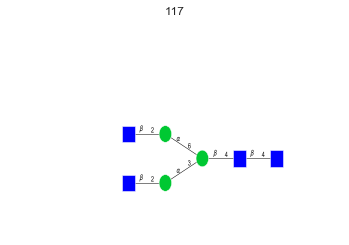

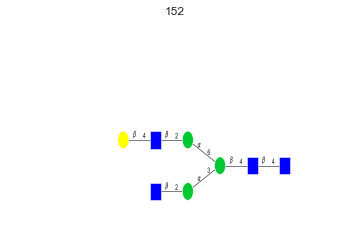

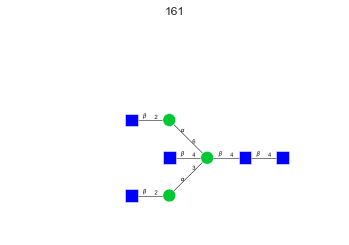

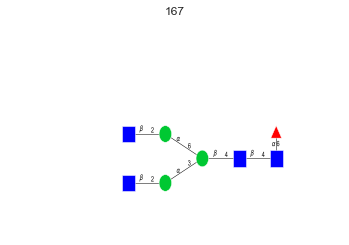

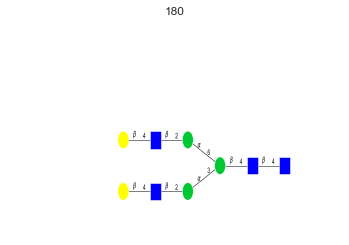

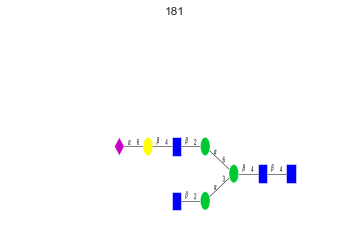

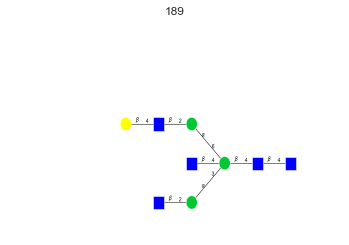

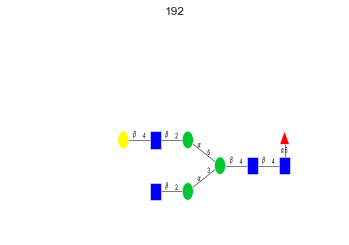

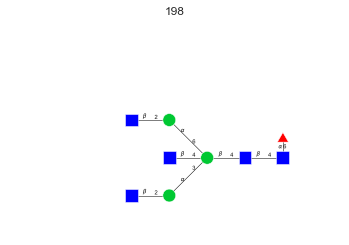

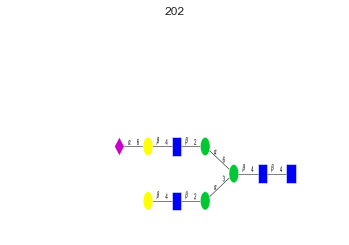

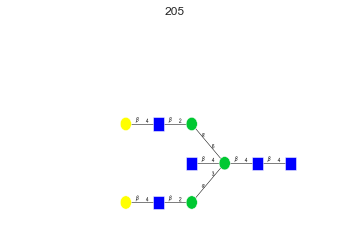

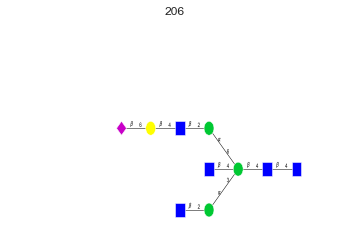

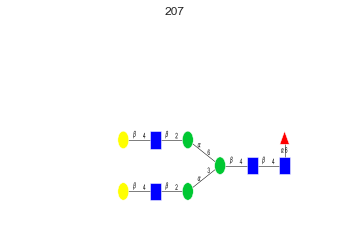

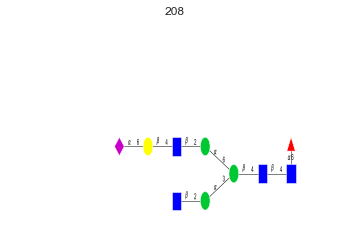

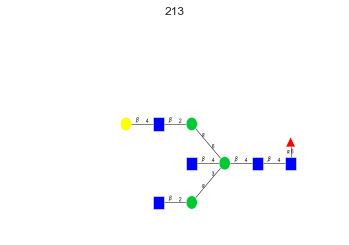

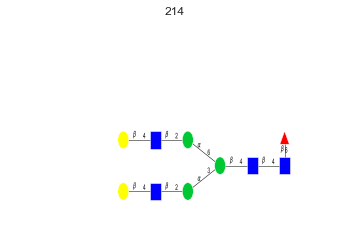

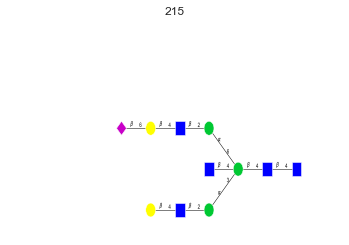

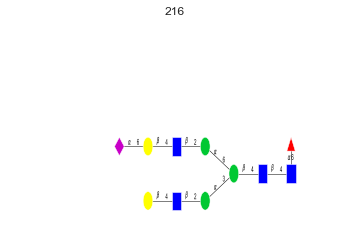

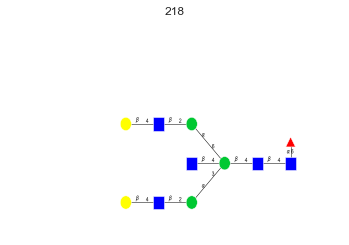

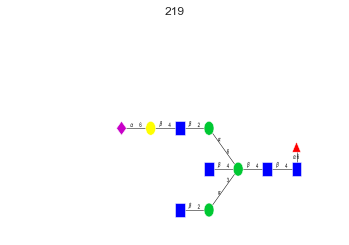

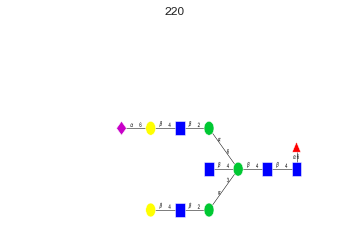

In [76]:
reload(pipeline_functions)
core=select_motifs.nglycan_core
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']
# assert os.path.isfile(substructure_glycoct_dict_addr), 'missing ' + substructure_glycoct_dict_addr
substructure_abd_table_addr = keywords_dict['substructure_abd_table_addr']
substructure_abd_table = pd.read_csv(substructure_abd_table_addr, index_col=0)
substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)
# _substructure_lab = select_substructures.substructureLabwithCore(substructure_dict, glycan_core=select_substructures.nglycan_core, linkage_specific=False)  # unicarbkb_substructures_12259.json
# _substructure_lab.get_dependence_tree_core()

# if not select_col:
select_col = substructure_abd_table.columns
_substructure_lab = select_motifs.substructureLabwithCore(substructure_=substructure_dict,
                                                    glycan_core=core,
                                                    linkage_specific=linkage_specific)  # unicarbkb_substructures_12259.json
_substructure_lab.get_dependence_tree_core()
a_node_state = select_motifs.NodesState(dependence_tree=_substructure_lab.substructure_dep_tree_core,
                                                substructure_weight=select_motifs.get_weight_dict(
                                                    substructure_abd_table[select_col]),
                                                linkage_specific=linkage_specific)
node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = a_node_state.nodes_dropping_pipe(
drop_parellel=False, drop_diff_abund=False)
print('_substructure_lab.core_index',_substructure_lab.core_index)
if _substructure_lab.core_index in mod_nodes:
        mod_nodes.remove(_substructure_lab.core_index)
        print("Removed core, the index is", _substructure_lab.core_index)
motif_dict = {}
for i in mod_nodes:
    motif_dict[i] = _substructure_lab.substructure_vec[i]
glycan_io.output_glycan_dict_to_glycoct_dict(motif_dict, keywords_dict['motif_glycoct_dict_addr'])

motif_abd_table = substructure_abd_table[select_col][substructure_abd_table.index.isin(mod_nodes)]
motif_abd_table_addr = keywords_dict['motif_abd_table_addr']
motif_abd_table.to_csv(motif_abd_table_addr)
for i in mod_nodes:
    plot_glycan_utilities.plot_glycan(_substructure_lab.substructure_vec[i], 
                                      title=i, 
                                      label=True,
                                      addr=keywords_dict['plot_output_dir'] + 'motif_'+str(i)+'.eps')
#     plt.savefig()
#     print(keywords_dict['plot_output_dir'] + 'motif_'+str(i)+'.eps')

In [70]:
keywords_dict['plot_output_dir']

'/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_plot/'

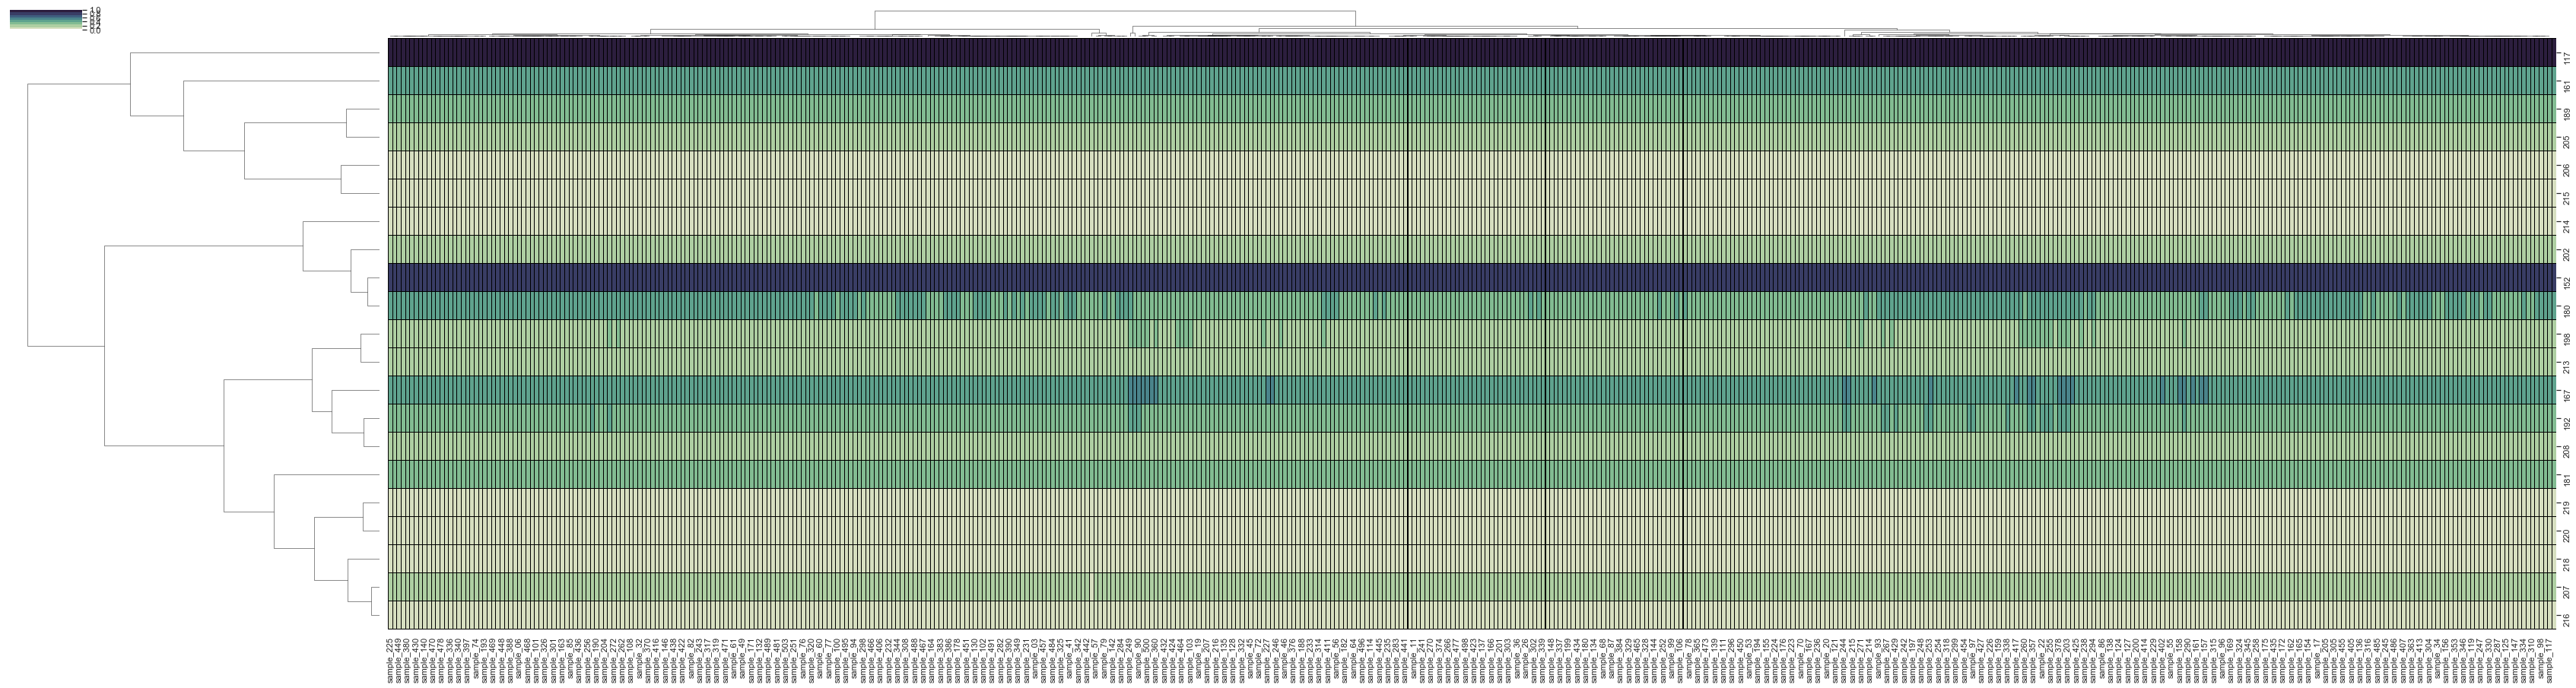

In [63]:
# keywords_dict['abundance_table.csv'] = 
# glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
#                                            motif_abd_table=motif_abd_table, )
# glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
#                                            motif_abd_table=motif_abd_table, 
#                                            select_profile_name = selected_name_list)
selected_name_list = motif_abd_table.columns.tolist()

    # df_ncore=pd.DataFrame(data=preprocessing.scale(df_ncore.transpose()).transpose(), index=df_ncore.index, columns=df_ncore.columns)
    # motif_abd_table.to_csv(os.path.join(keywords_dict['intermediate_dir'],
    #                                     str(len(selected_name_list)) + r"selected_abundance_matrix.txt"))
    # motif_abd_table.colmuns = selected_name_list

    # plt.savefig(keywords_dict['plot_output_dir'] + 'pseudo_profile_clustering.svg')
# motif_abd_table.drop()
cluster_grid = clustering_analysis.draw_glycan_clustermap(motif_abd_table=motif_abd_table,
                                                              address=keywords_dict[
                                                                          'plot_output_dir'] + 'pseudo_profile_clustering.eps',
                                                              metric="correlation",
                                                              cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
                                                              linewidths=0.01,
                                                              figsize=(60,15),
                                                              linecolor='black',
                                                              method='complete')

In [64]:
motif_abd_table.shape

(21, 504)